# Introduction to complex networks theory
## Lesson 3: Networkx library & Node degree distribution.

The goal of this notebook is to start geting familiar with the [networkx](https://networkx.org/) library, specially:
- network creation
- network import/export
- network drawing
- node properties & degree distribution of a network

So let's start!

### Imports

Although you can import libraries anywhere in the notebook (e.g. just before you need it), it's a good practice to import libraries at the beginning of the notebook.

In this notebook might user libraries for data manipulation [pandas](https://pandas.pydata.org/docs/), plotting [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) and [networkx](https://networkx.org/documentation/stable/index.html). Links to documentation for these libraries are included, use them when you get stuck.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

If you don't have some of the libraries, import command will cause error and you should install library and run import command again.

You can install libraries from terminal or using conda, but you can do it here as well, using 

```!pip install networkx```

In [2]:
# !pip install networkx

You can check version of any of the imported libraries using ```__version__```

In [3]:
nx.__version__

'2.6.3'

### Network creation

We will start with creating and drawing simple networks.

Graph object creation is done using ```nx.Graph()```

In [4]:
G = nx.Graph()

We created an empty graph object without any data stored in it.
Now, we can start populating the graph by adding nodes and edges between them.

We can add nodes either one by one using 
`G.add_node`

In [5]:
G.add_node('a')

To check if anything happened, we can draw the G object, that way, similarly to using print we can convince ourself that the object G changed.

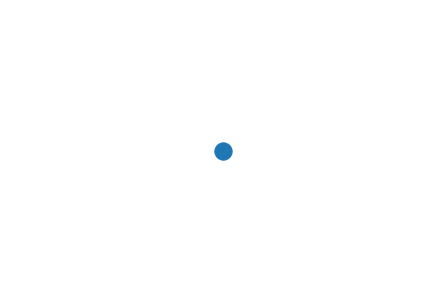

In [6]:
nx.draw(G)

You can also add multiple nodes at the same time using `G.add_nodes_from` and pass the list to this method:

In [7]:
G.add_nodes_from(['b','c','d']) 

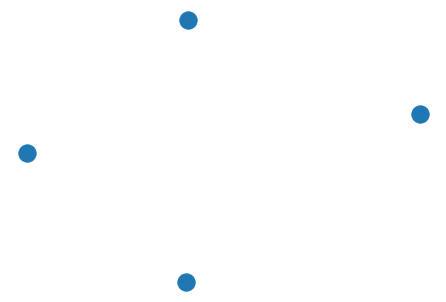

In [8]:
nx.draw(G)

Now we can also add some links between these nodes, for that we'll use `add_edge` or `add_edges_from` in the same way as with node functions (to add single edge, or to add multiple edges).

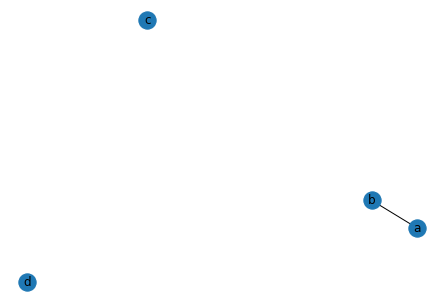

In [9]:
G.add_edge('a','b')
nx.draw(G, with_labels=True)

Now we drawn the network with anotations on the nodes to be sure the link is added exactly where we wanted it.

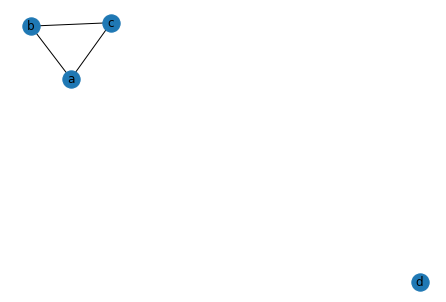

In [10]:
edges_to_add = [('a', 'c'), ('b', 'c')]
G.add_edges_from(edges_to_add)
nx.draw(G, with_labels=True)

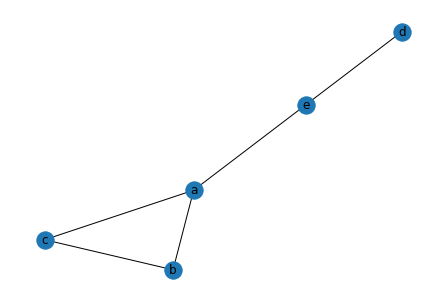

In [11]:
edges_to_add = [('a', 'e'), ('e', 'd')]
G.add_edges_from(edges_to_add)
nx.draw(G, with_labels=True)

As you could see in the previous code block, even if we didn't have node `e`, by adding it in the list of edges, networkx understood that's a new node and connected it appropriately.

We can see the list of nodes by using `G.nodes()`

In [12]:
G.nodes()

NodeView(('a', 'b', 'c', 'd', 'e'))

Similarly, by using `edges()` we can see the list of edges:

In [13]:
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('a', 'e'), ('b', 'c'), ('d', 'e')])

Nodes can be longer strings (not only characters), numbers,... try!

In [14]:
# G.add_edges_from([('saska','a'),(0.342,'b'),(-4,'c')])
# nx.draw(G,with_labels=True)

We can also change a bit how the network looks like when we plot it (all optional arguments you can see in [documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx) or by running `?nx.draw`):

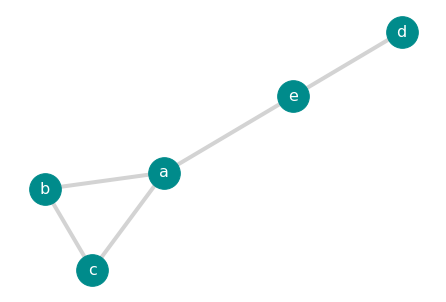

In [15]:
nx.draw(G,
        with_labels=True,
        node_color='darkcyan',
        node_size=1000,
        edge_color='lightgrey',
        width=4,
        font_color='white',
        font_size=16,
        )

If you rerun previous code (or any of the code blocks that created drawing command) you'll see that network layout changes all the time. 

We can quickly get the number of nodes or links by using `number_of_` functions:

In [16]:
G.number_of_nodes(),G.number_of_edges()

(5, 5)

For some applications, it is useful to get all neighbouring nodes of one node:

In [17]:
G.neighbors('c')
#list(G.neighbors('c'))
# for node in G.neighbors('c'):
#   print('a neighbour of c is %s'%node)

You can investigate whether specific node exist in your network:

In [18]:
G.has_node('k')

False

#### how would you check if an edge exist in the network?

In [19]:
# place for your code

We can also remove nodes or edges:

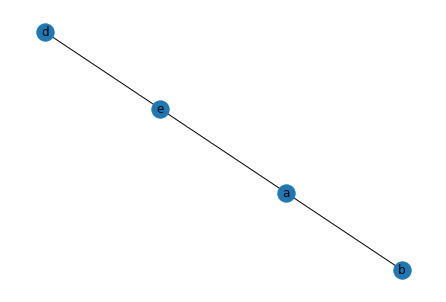

In [20]:
G.remove_node('c')
nx.draw(G,with_labels=True)

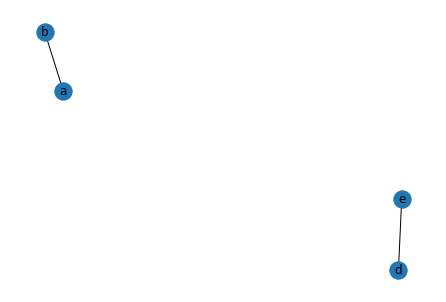

In [21]:
G.remove_edge('a','e')
nx.draw(G,with_labels=True)

**Note**: Functions vs methods

As you have seen, sometimes we get our results using G.some_command() (example: G.remove_edge()) and sometimes we do nx.some_command(G,...) (example: nx.draw(G)).
The first are methods defined for the graph object, while the later are set of instructions (functions) implemented in networkx library to be used with graph objects but also other objects.

### Import/Export networks

As most of the time we would like to work with some larger networks, adding the nodes or links one by one to an empty object can be tiring. 

Most of the time:
- we will import already existing network data
- we will create networks from our data

We will cover now the first, while the second will be topic for future classes (e.g. when we cover network models).

List of read/write options in networkx you can see [here](https://networkx.org/documentation/stable/reference/readwrite/index.html).

#### Import list of edges in *.csv* format

Let's import table containing list of edges, for that we can create pandas library as in the previous class. 


There are a few networks in the data folder:
- london transport network, read more about it [here](https://networks.skewed.de/net/london_transport)
- network among jazz musitians, more details [here](https://networks.skewed.de/net/jazz_collab)
- realationships in computer science department, [here](https://networks.skewed.de/net/cs_department)

You can run this notebook several times, chaning the data sourse and investigating how results change.

In [22]:
edges_df = pd.read_csv('../data/cs_relationships/edges.csv')
edges_df.head(2)

,# source,target,weight,layer
0,0,1,1,1
1,0,2,1,1


We loaded list of edges in a dataframe. We see that the network is represented via list of edges, all defined by a sourse and the target.

From this dataframe we can create a network using `nx.from_pandas_edgelist` function:

In [23]:
edges_df = edges_df.rename(columns={'# source':'source',' target':'target'})
edges_df.head()

,source,target,weight,layer
0,0,1,1,1
1,0,2,1,1
2,1,10,1,5
3,1,11,1,5
4,1,17,1,5


In [24]:
# ?nx.from_pandas_edgelist
G = nx.from_pandas_edgelist(edges_df)#, source = 'source',target='target') 

Let's see what we imported:

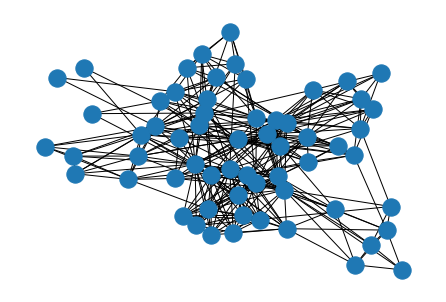

In [25]:
nx.draw(G)

#### Export 
As with import, we can save network in multiple ways (one for example by saving the panda dataframe using `df.to_csv`), but here we'll use another format that is suitable if you want to change network visual appearance in another popular software [Gephi](https://gephi.org/).

In [26]:
nx.write_gexf(G, "../data/network.gexf")

Of course, you could also load the network from *gexf* file using `nx.read_gexf`.

Interesting feature of the network data we loaded is that we have several different networks in one dataframe, and that is shown via the layer column. More on layers in some other class, but here we can just see how differently the network looks like if we focus only on subset of datafram with layer = 1 (that is showing only 'having lunch together' relationships between the scientists).

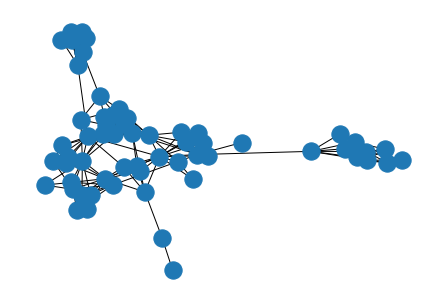

In [27]:
Glunch = nx.from_pandas_edgelist(edges_df[edges_df[' layer']==1])
nx.draw(Glunch)

In [28]:
G.number_of_nodes(),Glunch.number_of_nodes()

(61, 60)

In [29]:
G.number_of_edges(),Glunch.number_of_edges()

(353, 193)

#### Some variations for drawing networks

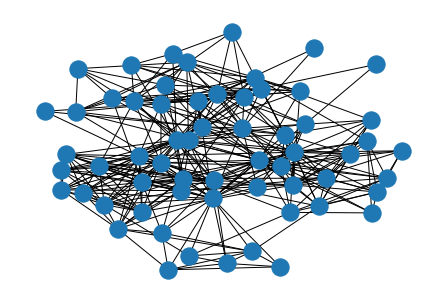

In [30]:
nx.draw_kamada_kawai(G)

In [31]:
?nx.draw_networkx_edges

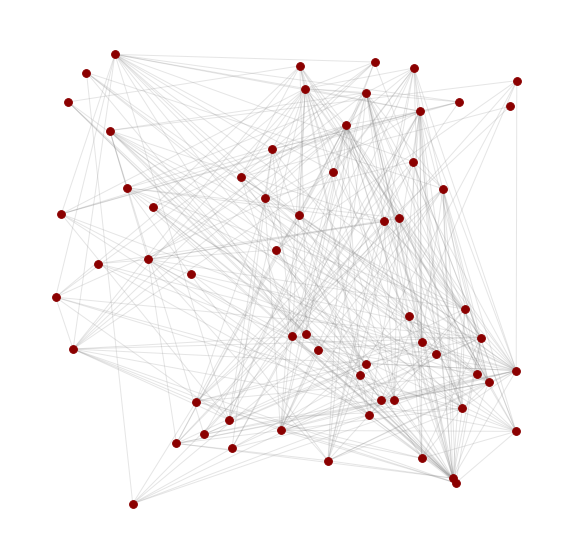

In [32]:
plt.figure(figsize=(10,10))
pos = nx.random_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=60,node_color='darkred')
nx.draw_networkx_edges(G, pos, alpha=0.2,edge_color='grey')
plt.axis('off')
plt.show()

# Degrees

In [33]:
G.nodes()

NodeView((0, 1, 2, 10, 11, 17, 20, 36, 39, 40, 4, 50, 6, 7, 43, 56, 45, 5, 8, 3, 9, 13, 14, 15, 12, 16, 19, 18, 22, 21, 34, 33, 25, 29, 38, 27, 28, 30, 31, 32, 35, 41, 44, 24, 42, 55, 57, 59, 48, 49, 51, 46, 23, 26, 47, 37, 53, 58, 52, 54, 60))

In [34]:
G.degree(51)

10

In [35]:
G.neighbors(51)
# len(list(G.neighbors(51)))

In [36]:
G.degree()

DegreeView({0: 2, 1: 12, 2: 10, 10: 17, 11: 9, 17: 15, 20: 18, 36: 13, 39: 10, 40: 8, 4: 9, 50: 23, 6: 29, 7: 14, 43: 26, 56: 6, 45: 19, 5: 12, 8: 8, 3: 14, 9: 7, 13: 5, 14: 10, 15: 6, 12: 17, 16: 9, 19: 8, 18: 18, 22: 22, 21: 3, 34: 14, 33: 24, 25: 21, 29: 14, 38: 14, 27: 12, 28: 11, 30: 19, 31: 11, 32: 15, 35: 10, 41: 6, 44: 8, 24: 17, 42: 8, 55: 11, 57: 9, 59: 2, 48: 5, 49: 9, 51: 10, 46: 9, 23: 13, 26: 13, 47: 6, 37: 7, 53: 8, 58: 6, 52: 5, 54: 6, 60: 4})

In [37]:
list_degrees = []
for node in G.nodes():
    list_degrees.append(G.degree(node))
list_degrees

[2,
 12,
 10,
 17,
 9,
 15,
 18,
 13,
 10,
 8,
 9,
 23,
 29,
 14,
 26,
 6,
 19,
 12,
 8,
 14,
 7,
 5,
 10,
 6,
 17,
 9,
 8,
 18,
 22,
 3,
 14,
 24,
 21,
 14,
 14,
 12,
 11,
 19,
 11,
 15,
 10,
 6,
 8,
 17,
 8,
 11,
 9,
 2,
 5,
 9,
 10,
 9,
 13,
 13,
 6,
 7,
 8,
 6,
 5,
 6,
 4]

In [38]:
degree_df = pd.DataFrame(G.degree(),columns=['nodes','degrees'])
degree_df.head()

,nodes,degrees
0,0,2
1,1,12
2,2,10
3,10,17
4,11,9


In [39]:
degree_df = degree_df.sort_values(by='nodes')

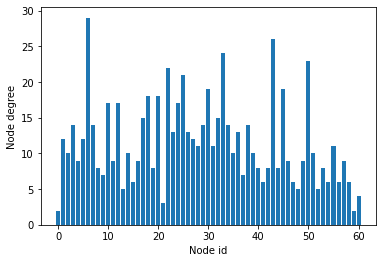

In [40]:
plt.bar(degree_df['nodes'],degree_df['degrees'])
plt.xlabel('Node id')
plt.ylabel('Node degree')
plt.show()

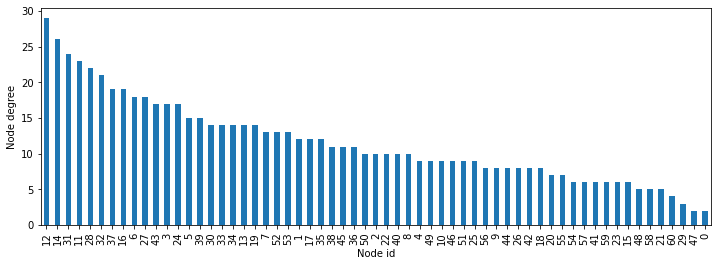

In [41]:
degree_df = degree_df.sort_values(by='degrees',ascending=False)

plt.figure(figsize=(12,4))
degree_df['degrees'].plot(kind='bar')
plt.xlabel('Node id')
plt.ylabel('Node degree')

plt.show()

In [42]:
degree_df.describe()

,nodes,degrees
count,61.000000,61.000000
mean,30.000000,11.573770
std,17.752934,5.967856
min,0.000000,2.000000
25%,15.000000,8.000000
50%,30.000000,10.000000
75%,45.000000,14.000000
max,60.000000,29.000000


In [43]:
degree_df.degrees.mean(),degree_df.degrees.median()

(11.573770491803279, 10.0)

### Histograms

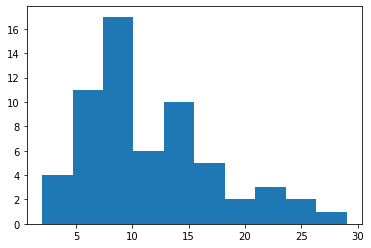

In [44]:
plt.hist(degree_df.degrees)
plt.show()

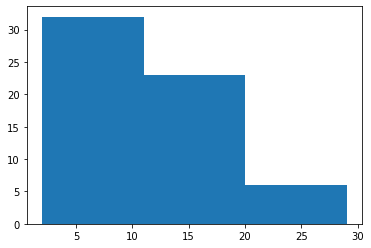

In [45]:
plt.hist(degree_df.degrees,bins=3)
plt.show()

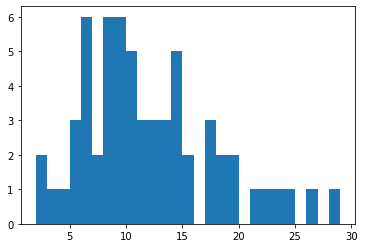

In [46]:
plt.hist(degree_df.degrees,
         bins=[i for i in range(min(degree_df.degrees),max(degree_df.degrees)+1,1)])
plt.show()

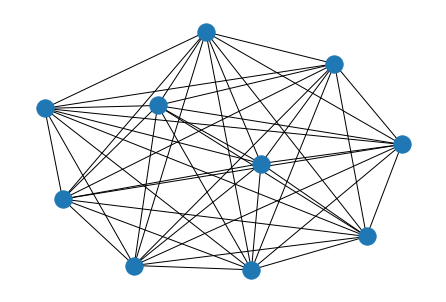

In [47]:
Gcomplete = nx.complete_graph(10) 
nx.draw(Gcomplete)

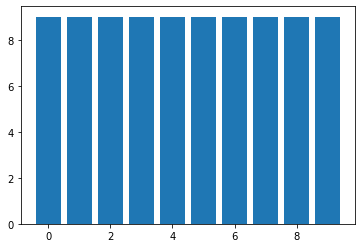

In [48]:
plt.bar([*range(10)],dict(Gcomplete.degree()).values())
plt.show()

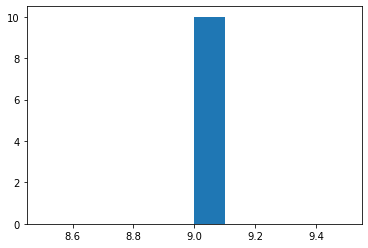

In [49]:
plt.hist(dict(Gcomplete.degree()).values())
plt.show()

In [50]:
def plot_degree_dist(graph,bins=10):
    degree_df = pd.DataFrame(graph.degree(),columns=['nodes','degrees'])
    plt.hist(degree_df.degrees, bins=bins)
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes with given degree')
    plt.title('Degree distribution')
    return degree_df

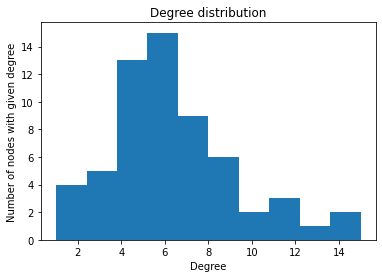

In [51]:
_ = plot_degree_dist(Glunch,10)

In [52]:
A = nx.adjacency_matrix(Gcomplete)

In [53]:
A

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [54]:
A.todense()

matrix([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

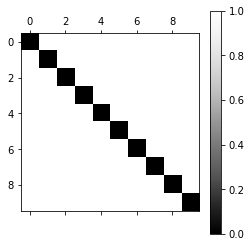

In [55]:
plt.matshow(A.todense(),cmap='Greys_r')
plt.colorbar()

In [56]:
A = nx.adjacency_matrix(Glunch)
A.todense()
# plt.matshow(A.todense(),cmap='Greys_r')
# plt.colorbar()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]])

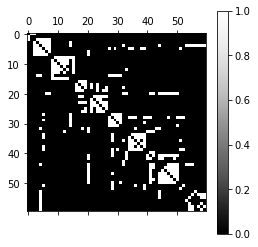

In [57]:
plt.matshow(A.todense(),cmap='Greys_r')
plt.colorbar()

### Anoter network example

In [58]:
marvel_df = pd.read_csv('../data/marvel_universe/edges.csv')
marvel_df.head(2)

,# source,target
0,0,6486
1,1,6487


In [59]:
marvel_G = nx.from_pandas_edgelist(marvel_df,source='# source', target = ' target')

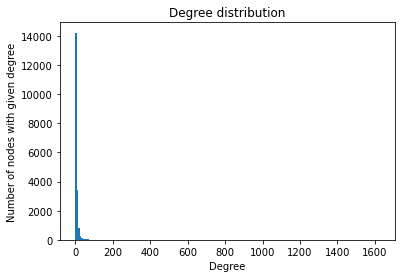

In [60]:
deg_dist = plot_degree_dist(marvel_G,bins=200)
#plt.yscale('log')

Here we see that majority of nodes have very small degree, while a few nodes have more than 1000 neighbours. Let's see what are the biggest number of neighbours a node has:

In [61]:
deg_dist.sort_values(by='degrees',ascending=False)

,nodes,degrees
17855,5305,1625
7264,858,1367
13618,2663,1168
18393,5715,990
18439,5735,965
...,...,...
5345,11297,1
14842,3294,1
5346,11298,1
5348,11300,1


And also the total number of nodes that only have one neighbour:

In [62]:
deg_dist[deg_dist.degrees==1].size

6742

Fun fact, in the file **nodes.csv** we can find the name of characters, so we can find out who are those who have the most connections:

In [63]:
names = pd.read_csv('../data/marvel_universe/nodes.csv')
names.head(2)

,# index,name,_pos
0,0,24-HOUR MAN/EMMANUEL,"array([-3.37927439, 36.77731148])"
1,1,3-D MAN/CHARLES CHAN,"array([-12.2896451 , 33.99193728])"


We can merge two tables `names` and `deg_dist` as they have the node id the same. For that we will use pandas function `merge`:

In [64]:
deg_dist_new = pd.merge(left = deg_dist,
         right = names[['# index',' name']],
         left_on= 'nodes',
         right_on='# index')
deg_dist_new.head()

,nodes,degrees,# index,name
0,0,1,0,24-HOUR MAN/EMMANUEL
1,6486,2,6486,AA2 35
2,1,9,1,3-D MAN/CHARLES CHAN
3,6487,1,6487,M/PRM 35
4,6488,1,6488,M/PRM 36


In [65]:
deg_dist_new.sort_values(by='degrees',ascending=False).head(10)

,nodes,degrees,# index,name
17855,5305,1625,5305,SPIDER-MAN/PETER PAR
7264,858,1367,858,CAPTAIN AMERICA
13618,2663,1168,2663,IRON MAN/TONY STARK
18393,5715,990,5715,THING/BENJAMIN J. GR
18439,5735,965,5735,THOR/DR. DONALD BLAK
13252,2556,908,2556,HUMAN TORCH/JOHNNY S
15696,3804,875,3804,MR. FANTASTIC/REED R
13090,2547,841,2547,HULK/DR. ROBERT BRUC
19172,6305,820,6305,WOLVERINE/LOGAN
13568,2649,782,2649,INVISIBLE WOMAN/SUE


Not that surprising :)